<a href="https://colab.research.google.com/github/t0r8ern1t/comp_mod/blob/main/mm_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.fft import fft

In [2]:
file_path = r"data.xlsx"
data = pd.read_excel(file_path, sheet_name='Лист1')

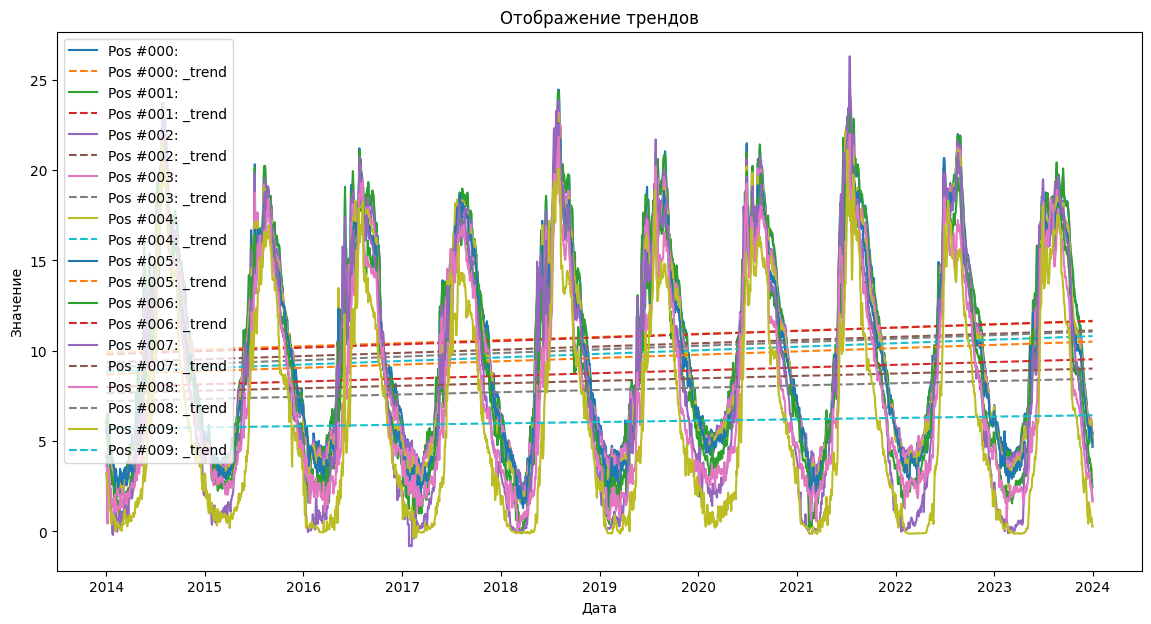

Pos #000: : p-value = 1.2158113937085592e-07
Pos #001: : p-value = 2.298576709222425e-08
Pos #002: : p-value = 1.605741440566962e-08
Pos #003: : p-value = 3.060304608571255e-10
Pos #004: : p-value = 4.445758492456268e-10
Pos #005: : p-value = 5.281364695624985e-09
Pos #006: : p-value = 1.327565407344925e-06
Pos #007: : p-value = 0.0002716262008928469
Pos #008: : p-value = 6.976720274555789e-05
Pos #009: : p-value = 0.02261714983264356


In [7]:
#1 - выделение, отображение и оценка тренда
for col in data.columns[1:]:
    data[f'{col}_trend'] = np.poly1d(np.polyfit(data.index, data[col], 1))(data.index)

plt.figure(figsize=(14, 7))
for col in data.columns[1:11]:
    plt.plot(data['Date'], data[col], label=col)
    plt.plot(data['Date'], data[f'{col}_trend'], linestyle='--', label=f'{col}_trend')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Отображение трендов')
plt.legend()
plt.show()

for col in data.columns[1:11]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(data.index, data[col])
    print(f'{col}: p-value = {p_value}')


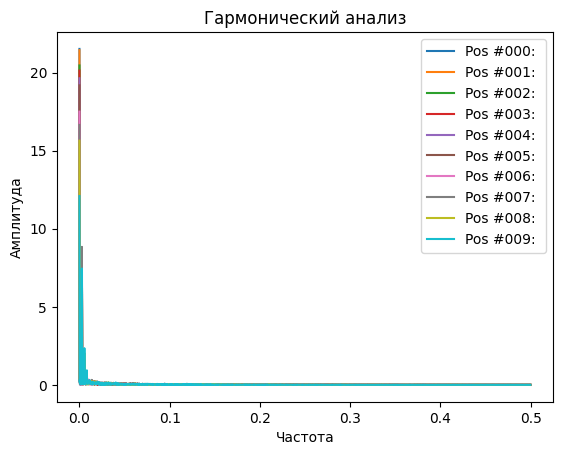


 выделение и преобразование гармоник
Pos #000: : [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72  73  74
  75  76  78  79  81  82  83  85  88  91  92  96  97 101 102 105 106 107
 112 113 115 116 117 118 121 123 124 127 128 131 132 133 134 135 137 138
 140 141 143 144 145 146 147 148 154 155 156 157 161 164 165 166 168 171
 174 175 176 184 189 204 207 211 212 217 222 225 232 233 242 252 255 261
 265 269 270 275 277 280 281 287 312 323 329 332 345 349 364 397 432]
Pos #001: : [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72 

In [8]:
#2 - гармонический анализ
for col in data.columns[1:11]:
    yf = fft(data[col].values)
    xf = np.fft.fftfreq(len(data[col]), 1)[:len(data[col])//2]
    plt.plot(xf, 2.0/len(data[col]) * np.abs(yf[:len(data[col])//2]), label=col)

plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt. title('Гармонический анализ')
plt.legend()
plt.show()


print('\n выделение и преобразование гармоник')
significant_harmonics = {}
threshold = 0.05
for col in data.columns[1:11]:
    yf = fft(data[col].values)
    xf = np.fft.fftfreq(len(data[col]), 1)[:len(data[col])//2]
    amplitudes = 2.0/len(data[col]) * np.abs(yf[:len(data[col])//2])
    significant_harmonics[col] = xf[amplitudes > threshold]


for col in significant_harmonics:
    significant_harmonics[col] = np.where(amplitudes > threshold)[0]

for col in significant_harmonics:
    print(f'{col}: {significant_harmonics[col]}')


print('\n оценка вклада гармоник')
total_variance = {}
harmonic_variance = {}
for col in data.columns[1:11]:
    total_variance[col] = np.var(data[col])
    yf = fft(data[col].values)
    amplitudes = 2.0/len(data[col]) * np.abs(yf[:len(data[col])//2])
    harmonic_variance[col] = np.sum(amplitudes[significant_harmonics[col]]**2)

for col in total_variance:
    print(f'{col}: {harmonic_variance[col] / total_variance[col]}')

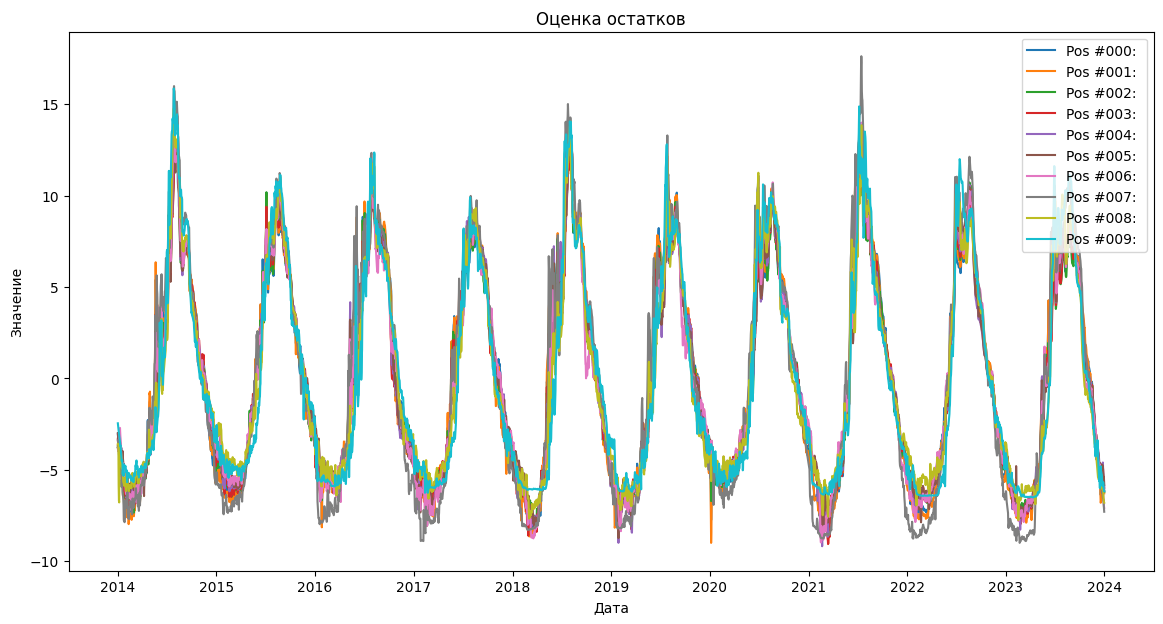

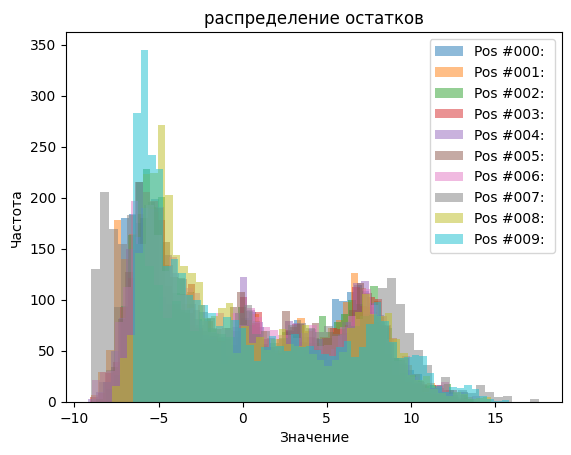

In [9]:
#3 - оценка остатков
for col in data.columns[1:11]:
    data[f'{col}_residual'] = data[col] - data[f'{col}_trend']

plt.figure(figsize=(14, 7))
for col in data.columns[1:11]:
    plt.plot(data['Date'], data[f'{col}_residual'], label=col)
plt.xlabel('Дата')
plt.ylabel('Значение')
plt. title('Оценка остатков')
plt.legend()
plt.show()

for col in data.columns[1:11]:
    plt.hist(data[f'{col}_residual'], bins=50, alpha=0.5, label=col)

plt.xlabel('Значение')
plt.ylabel('Частота')
plt. title('распределение остатков')
plt.legend()
plt.show()


 модельное уравнение
Pos #000: : Trend Coefficients: [4.69451359e-04 9.90214853e+00], Harmonic Coefficients: [ 3.92923500e+04  -0.j         -2.88310575e+02+549.42754752j
  1.59087815e+01 -65.51994413j ... -6.20686670e+01-230.13180058j
  1.59087815e+01 +65.51994413j -2.88310575e+02-549.42754752j]
Pos #001: : Trend Coefficients: [5.08442611e-04 9.79159705e+00], Harmonic Coefficients: [ 3.91485600e+04  -0.j         -2.72214904e+02+681.8448956j
 -1.60545563e+01-151.95943324j ... -3.23844445e+01-232.58945104j
 -1.60545563e+01+151.95943324j -2.72214904e+02-681.8448956j ]
Pos #002: : Trend Coefficients: [4.84601505e-04 9.34506422e+00], Harmonic Coefficients: [37358.88        -0.j          -335.55805672+638.88581504j
  -357.74295855 -39.09844074j ...  -225.35422286-135.03797045j
  -357.74295855 +39.09844074j  -335.55805672-638.88581504j]
Pos #003: : Trend Coefficients: [5.41302644e-04 9.07802946e+00], Harmonic Coefficients: [36761.68        -0.j          -258.87848737+794.35085939j
  -309.375

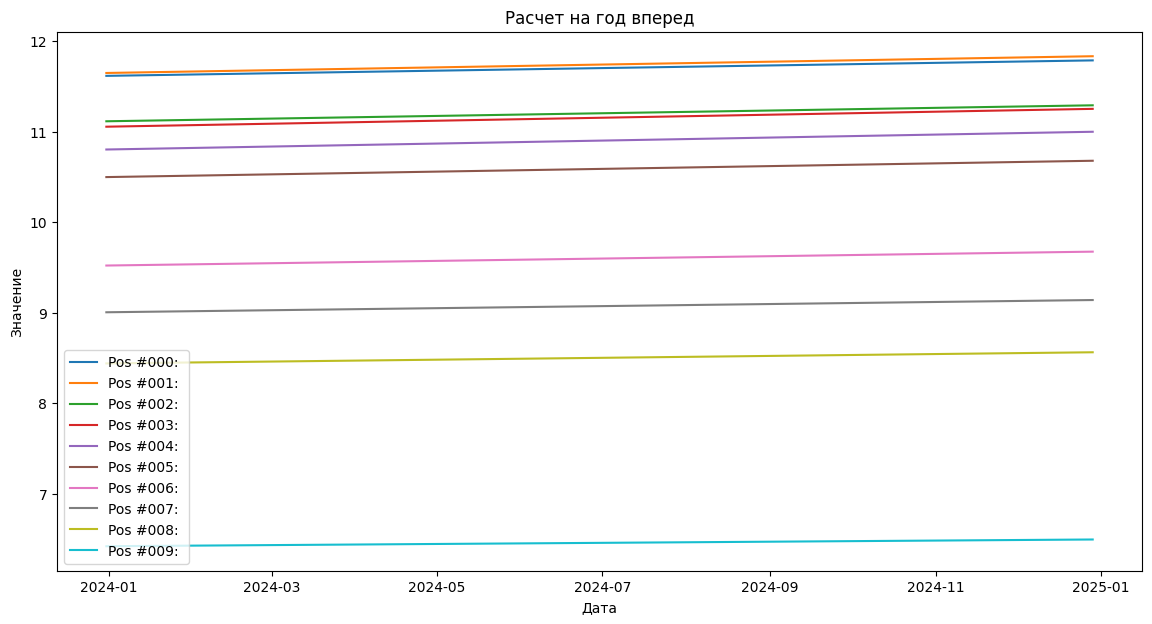

In [10]:
#4 - модельное уравнение
print('\n модельное уравнение')
model_equations = {}
for col in data.columns[1:11]:
    trend_coeffs = np.polyfit(data.index, data[col], 1)
    harmonic_coeffs = fft(data[col].values)
    model_equations[col] = (trend_coeffs, harmonic_coeffs)

for col in model_equations:
    print(f'{col}: Trend Coefficients: {model_equations[col][0]}, Harmonic Coefficients: {model_equations[col][1]}')


future_dates = pd.date_range(data['Date'].iloc[-1], periods=365, freq='D')
future_trends = {}
for col in data.columns[1:11]:
    trend = model_equations[col][0][0] * np.arange(len(data), len(data) + 365) + model_equations[col][0][1]
    future_trends[col] = trend

plt.figure(figsize=(14, 7))
for col in future_trends:
    plt.plot(future_dates, future_trends[col], label=col)
plt.xlabel('Дата')
plt.ylabel('Значение')
plt. title('Расчет на год вперед')
plt.legend()
plt.show()